**Importing the Libraries**

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**loading the dataset**

In [2]:
loan_data = pd.read_csv("/content/loan_data_set.csv")

In [3]:
#print the last 5 rows of the dataset
loan_data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
#print the shape of the dataset
loan_data.shape

(614, 13)

In [5]:
#Statistical measures
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#print the missing values
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
#checking info about the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_data = loan_data.drop("Loan_ID",axis=1)

In [9]:
loan_data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [10]:
loan_data["Loan_Amount_Term"]=loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean())

In [11]:
loan_data["LoanAmount"]=loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())

In [12]:
#print the first 5 rows of dataset
loan_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
null_col = ["Gender","Married","Dependents","Credit_History","Self_Employed"]
for col in null_col:
  loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])

# loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
# loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])

In [14]:
loan_data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


<Axes: xlabel='Education', ylabel='count'>

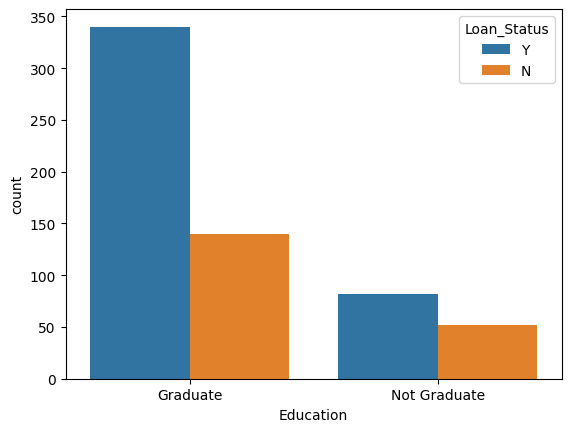

In [15]:
#plotting b/w Education and loan  status
sns.countplot(data=loan_data,x="Education",hue="Loan_Status")

In [16]:
loan_data["Dependents"].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [17]:
loan_data["Dependents"]=loan_data["Dependents"].replace(to_replace="3+",value=4)

<Axes: xlabel='Dependents', ylabel='count'>

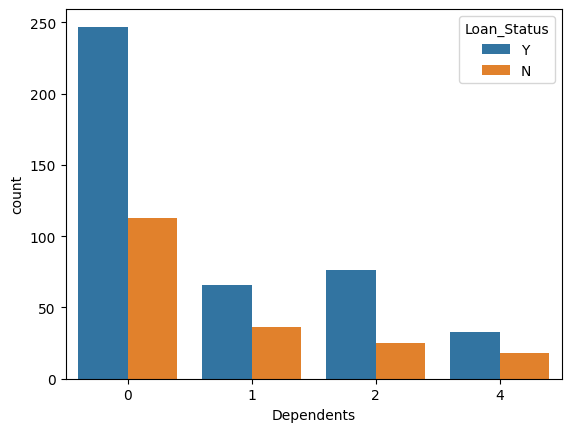

In [18]:
#plotting b/w Dependent and loan  status
sns.countplot(data=loan_data,x="Dependents",hue="Loan_Status")

In [19]:
#Label  encoding
encoder = LabelEncoder()
loan_data["Loan_Status"] = encoder.fit_transform(loan_data.Loan_Status)

In [20]:
#Label Encoding of multiple columns
encoder = LabelEncoder()
lab_col = ["Gender","Married","Education","Self_Employed","Property_Area"]
for col in lab_col:
  loan_data[col]=encoder.fit_transform(loan_data[col])


In [21]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [22]:
#splitting the features and target
X = loan_data.drop("Loan_Status",axis=1)
y = loan_data.Loan_Status

In [23]:
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


**Splitting into Training and Testing**

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3,test_size=0.3,stratify=y)

In [25]:
X_train.shape,X_test.shape

((429, 11), (185, 11))

In [26]:
model = SVC(kernel="linear")

In [27]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
#Accuracy on training data
X_train_pred = model.predict(X_train)
train_acc  = accuracy_score(X_train_pred,y_train)
print("accuracy of model in training is:",train_acc)

accuracy of model in training is: 0.7715617715617715


In [29]:
#Accuracy on testing data
X_test_pred = model.predict(X_test)
test_acc = accuracy_score(X_test_pred,y_test)
print("The accuracy of the model on testing is:",test_acc)

The accuracy of the model on testing is: 0.8162162162162162
